# Competição kaggle Titanic
O notebook foi desenvolvido com base na playlist do canal do YouTUbe [Canal Mario Filho](https://www.youtube.com/watch?v=K86voC1gRIk&list=PLwnip85KhroW8Q1JSNbgl06iNPeC0SDkx&index=3), onde apredi tecnicas para trabalhar com modelos de ML, no porjeto utilizo um modelo baseado em Random forest.

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

## Loading Data

In [2]:
dfTrain = pd.read_csv('./data/train.csv') # Train Data
dfTest = pd.read_csv('./data/test.csv') # Test Data

In [5]:
display(dfTrain, dfTest)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Cleaning the missing data

### Train data

In [8]:
# Visualizing the missin data
dfTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dfTrain['Age'] = dfTrain['Age'].fillna(-1)

dfTrain['Age'].isnull().sum()

0

## Test data

In [10]:
# Visualizing the missin data
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test['Age'] = test['Age'].fillna(-1)
test['Age'].isnull().sum()

0

# Generating the Model

In [7]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

## Create Variables
- Changing passagers gender for numbers:
    - female = 1
    - male = 0

In [11]:
dfTrain['sex_binary'] = dfTrain['Sex'].map(lambda x: 1 if x == 'female' else 0)

In [12]:
variables_train = ['sex_binary', 'Age']

In [13]:
# Creating the variables for model
x = dfTrain[variables_train]    # Param for prediction
y = dfTrain['Survived']   # What we want to predict

# Validation

## Split data for training and test
- Create the variables for training and valid the data
    - Training: x_train, y_train
    - Validation: x_valid, y_valid

In [15]:
np.random.seed(0)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.5)

In [16]:
# Fit model in training data
model.fit(x, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

# Croos Validation

## Creatinfg KFold object

In [17]:
results = []
for rep in range(10):
    print(f"Reptition count: {rep}")
    kf = KFold(2, shuffle=True, random_state=rep)
    for lines_train, lines_valid in kf.split(x):
        print("Train", lines_train.shape[0], "\nValid", lines_valid.shape[0])

        # Split data
        x_train, x_valid = x.iloc[lines_train], x.iloc[lines_valid]
        y_train, y_valid = y.iloc[lines_train], y.iloc[lines_valid]

        # Create model and fit model
        model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        model.fit(x_train, y_train)

        # Predict model
        model_predict = model.predict(x_valid)

        # Creating accuracy
        acc = np.mean(y_valid == model_predict)
        results.append(acc)    # Salving accuracy data

        # Visualizing the result
        print(f"Accuracy: {acc} \n")

Reptition count: 0
Train 445 
Valid 446
Accuracy: 0.7713004484304933 

Train 446 
Valid 445
Accuracy: 0.7797752808988764 

Reptition count: 1
Train 445 
Valid 446
Accuracy: 0.7443946188340808 

Train 446 
Valid 445
Accuracy: 0.7955056179775281 

Reptition count: 2
Train 445 
Valid 446
Accuracy: 0.7757847533632287 

Train 446 
Valid 445
Accuracy: 0.7887640449438202 

Reptition count: 3
Train 445 
Valid 446
Accuracy: 0.7533632286995515 

Train 446 
Valid 445
Accuracy: 0.7573033707865169 

Reptition count: 4
Train 445 
Valid 446
Accuracy: 0.7354260089686099 

Train 446 
Valid 445
Accuracy: 0.7415730337078652 

Reptition count: 5
Train 445 
Valid 446
Accuracy: 0.7219730941704036 

Train 446 
Valid 445
Accuracy: 0.7056179775280899 

Reptition count: 6
Train 445 
Valid 446
Accuracy: 0.7757847533632287 

Train 446 
Valid 445
Accuracy: 0.7303370786516854 

Reptition count: 7
Train 445 
Valid 446
Accuracy: 0.7040358744394619 

Train 446 
Valid 445
Accuracy: 0.7348314606741573 

Reptition count:

In [18]:
np.mean(results)

0.7550007557817302

(array([2., 1., 1., 2., 3., 2., 1., 3., 2., 3.]),
 array([0.70403587, 0.71318285, 0.72232982, 0.7314768 , 0.74062377,
        0.74977075, 0.75891772, 0.76806469, 0.77721167, 0.78635864,
        0.79550562]),
 <BarContainer object of 10 artists>)

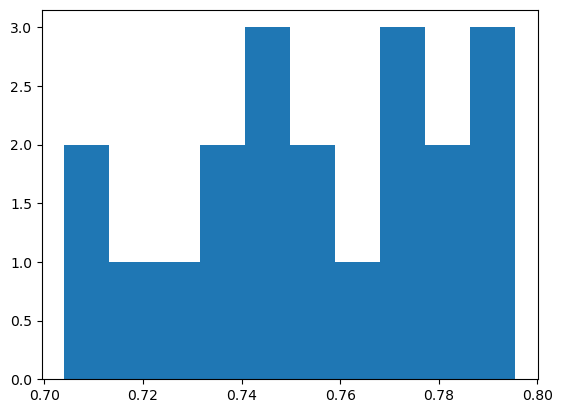

In [44]:
plt.hist(results)

## Predict model

In [19]:
# Predict with function (train_test_split)
p = model.predict(x_valid)

In [20]:
# Predict With param 'All women survived'
women_survived = (x_valid['sex_binary'] == 1).astype(np.int64)

# Applying the model in the test

##  Create Variables
- The same Changing in train table

In [21]:
test['sex_binary'] = test['Sex'].map(lambda x: 1 if x == 'female' else 0)

variables_test = ['sex_binary', 'Age']

## Test Model

In [22]:
x_prev = test[variables_test]
x_prev.head()

,sex_binary,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [26]:
predict_test = model.predict(x_prev)

# Saving the result for Kaggle competition

In [27]:
submition = pd.Series(predict_test, index=test['PassengerId'], name='Survived')

In [30]:
submition.to_csv('./predict/RandomForestClassifier.csv', header=True)

## Visualizing the accuracy of predict